# Benchmarking
This is a first stab at making benchmarks from Python instead of shell/gnuplot, which is the method that has been used until now.
It may make sense to add code for generating new benchmark numbers, e.g. using one of the methods
[listed in this stackoverflow article](https://stackoverflow.com/questions/3652554/calling-java-from-python), or anything else really

The main motivation behind revamping the test setup is not really to use python, but to uncover more information about the
actual performance.  For instance, it seems like the regex matcher at present has an 18% disadvantage wrs to java matching.
However, that is based on the "unfair test", which is deliberately unfair, giving java a good chance to outperform rmatch.

Also the the test runs are short, and there may be benefit in running more extensive tests, both with respect to
length of input and with respect to number of regular expressions.  The complexity of the expressions should also be
variable.

However, the idea of benchmarking towards the java regex library is still a good one, and one that the revamped test regime should
build on.



In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TODO: Maybe fix the date formatting using [this trick](https://stackoverflow.com/questions/23294197/plotting-chart-with-epoch-time-x-axis-using-matplotlib).

In [262]:
df0 = pd.read_csv('rmatch-tester/measurements/handle-the-wuthering-heights-corpus.csv')
df1 = df0.tail(5)

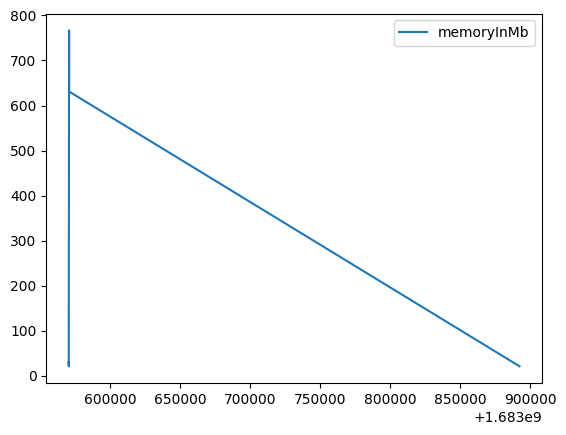

In [263]:
plt.plot(df1["secondsSinceEpoch"], df1["memoryInMb"], label="memoryInMb")
plt.legend()
plt.show()

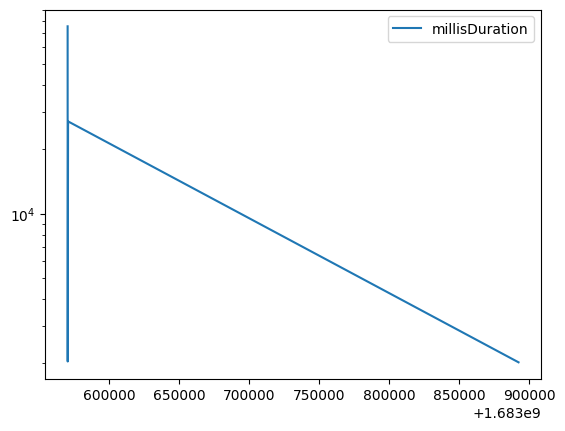

In [264]:
plt.plot(df1["secondsSinceEpoch"], df1["millisDuration"], label="millisDuration")
plt.yscale("log")
plt.legend()
plt.show()

In [265]:
df = pd.read_csv('rmatch-tester/logs/logfile-2023-05-08-20:37:45.csv')

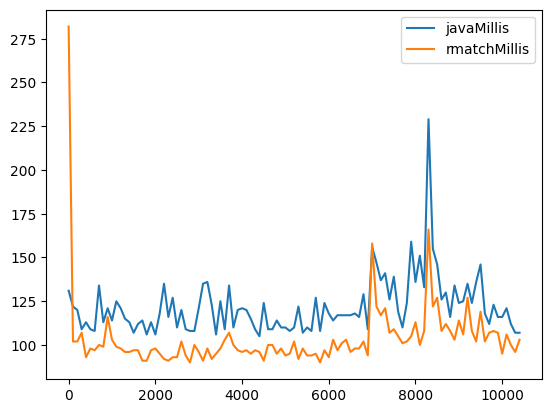

In [266]:
plt.plot(df["NoOfRegexps"], df[" javaMillis"], label="javaMillis")
plt.plot(df["NoOfRegexps"], df[" regexMillis"], label="rmatchMillis")
plt.legend()
plt.show()

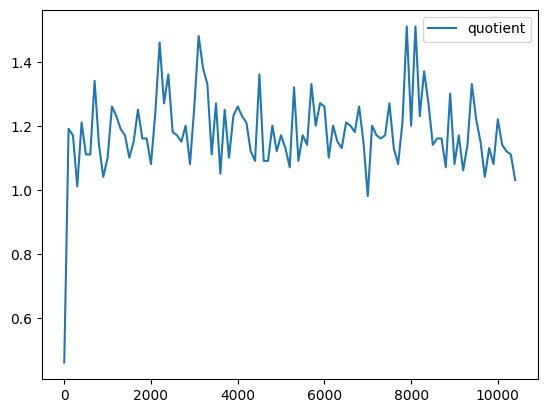

In [267]:
plt.plot(df["NoOfRegexps"], df[" quotient"], label="quotient")
plt.legend()
plt.show()

In [268]:
df[" quotient"].std()

0.12511474586834134

In [269]:
df[" quotient"].mean()

1.181047619047619

In [270]:
df[" javaMillis"].std()

16.22013739593032

In [271]:
df[" javaMillis"].mean()

121.65714285714286

In [272]:
df[" regexMillis"].std()

21.037869221761536

In [273]:
df[" regexMillis"].mean()

103.81904761904762

# Study the large corpus test and evolution over time

In [274]:
largeCorpusDf = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')

In [275]:
largeCorpusDf


,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1685381111193,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,1932,146562,java,537,11434,1144409,8,19566,1154369,12.818087
77,1685381257742,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,2635,132980,java,535,10651,1144409,8,19566,1154369,12.485212
78,1685381395764,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,670,125898,java,534,9492,1144409,8,19566,1154369,13.263591
79,1685381559675,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,2013,143168,java,533,16105,1144409,8,19566,1154369,8.889662


In [276]:
largeCorpusDf["regexPerMilli1"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis1"]
largeCorpusDf["regexPerMilli2"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis2"]
largeCorpusDf["regex2to1ratio"] = largeCorpusDf["regexPerMilli2"] /   largeCorpusDf["regexPerMilli1"]



In [277]:
largeCorpusDf

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000,3.041542e+08,3.481048e+09,11.445013
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000,2.055717e+08,3.629573e+09,17.656000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000,3.264788e+08,3.877749e+09,11.877493
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000,6.822848e+07,7.964248e+08,11.672908
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000,1.423734e+08,1.432726e+09,10.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1685381111193,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,1932,146562,java,537,11434,1144409,8,19566,1154369,12.818087,1.541080e+05,1.975370e+06,12.818086
77,1685381257742,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,2635,132980,java,535,10651,1144409,8,19566,1154369,12.485212,1.698480e+05,2.120588e+06,12.485213
78,1685381395764,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,670,125898,java,534,9492,1144409,8,19566,1154369,13.263591,1.794022e+05,2.379518e+06,13.263590
79,1685381559675,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,2013,143168,java,533,16105,1144409,8,19566,1154369,8.889662,1.577614e+05,1.402445e+06,8.889662


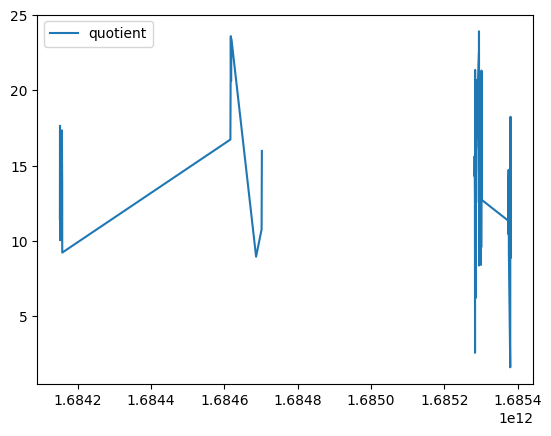

In [278]:
plt.plot(largeCorpusDf["timestamp"], largeCorpusDf["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

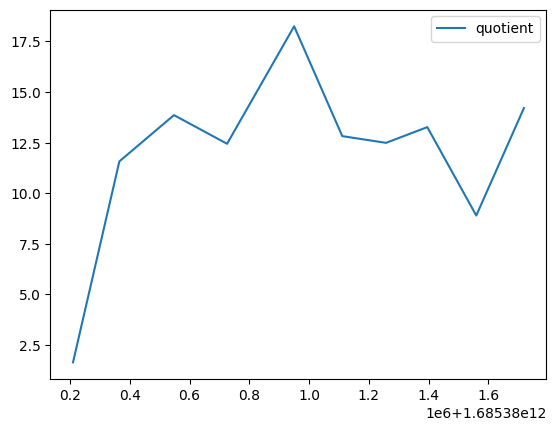

In [279]:
lastTen = largeCorpusDf.iloc[-10:]
plt.plot(lastTen["timestamp"], lastTen["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

In [280]:

lastTen

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
71,1685380210149,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,2218,102796,java,536,63137,1144409,8,19566,1154369,1.628142,219720.454629,3.577361e+05,1.628142
72,1685380365200,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,636,139477,java,531,12058,1144409,8,19566,1154369,11.567175,161936.260846,1.873145e+06,11.567175
73,1685380547947,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,1309,166754,java,536,12034,1144409,8,19566,1154369,13.856905,135447.328724,1.876881e+06,13.856905
74,1685380725704,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,1545,160846,java,534,12930,1144409,8,19566,1154369,12.439753,140422.415565,1.746820e+06,12.439753
75,1685380950155,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,1951,209465,java,534,11477,1144409,8,19566,1154369,18.250849,107828.915828,1.967969e+06,18.250850
76,1685381111193,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,1932,146562,java,537,11434,1144409,8,19566,1154369,12.818087,154108.048839,1.975370e+06,12.818086
77,1685381257742,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,2635,132980,java,535,10651,1144409,8,19566,1154369,12.485212,169847.976042,2.120588e+06,12.485213
78,1685381395764,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,670,125898,java,534,9492,1144409,8,19566,1154369,13.263591,179402.245103,2.379518e+06,13.263590
79,1685381559675,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,2013,143168,java,533,16105,1144409,8,19566,1154369,8.889662,157761.398176,1.402445e+06,8.889662
80,1685381719123,28CC3751-BA44-4B0D-BA81-27F159A3079C,u/la3lma/optimize-using-chatgtp,rmatch,1218,145394,java,533,10234,1144409,8,19566,1154369,14.206957,155346.051790,2.206995e+06,14.206957


In [281]:
import sqlite3

In [282]:


df = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')
print(df)


        timestamp                          testSeriesId   
0   1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7  \
1   1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   
2   1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   
3   1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   
4   1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   
..            ...                                   ...   
76  1685381111193  28CC3751-BA44-4B0D-BA81-27F159A3079C   
77  1685381257742  28CC3751-BA44-4B0D-BA81-27F159A3079C   
78  1685381395764  28CC3751-BA44-4B0D-BA81-27F159A3079C   
79  1685381559675  28CC3751-BA44-4B0D-BA81-27F159A3079C   
80  1685381719123  28CC3751-BA44-4B0D-BA81-27F159A3079C   

                           metadata matcherTypeName1  usedMemoryInMb1   
0                            master           rmatch              917  \
1                            master           rmatch              599   
2                            master           rmatch              247   

In [283]:
import os
dbfile = 'measurements.sqlite'
if os.path.exists(dbfile):
    os.remove(dbfile)


In [284]:

table_name = 'Measurements'

query = f'Create table if not Exists {table_name} (timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,"2to1Ratio")'


In [285]:
conn = sqlite3.connect(dbfile)
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

In [286]:
conn = sqlite3.connect(dbfile)
r_df = pd.read_sql("select * from Measurements",conn)
print(r_df)

        timestamp                          testSeriesId   
0   1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7  \
1   1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   
2   1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   
3   1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   
4   1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   
..            ...                                   ...   
76  1685381111193  28CC3751-BA44-4B0D-BA81-27F159A3079C   
77  1685381257742  28CC3751-BA44-4B0D-BA81-27F159A3079C   
78  1685381395764  28CC3751-BA44-4B0D-BA81-27F159A3079C   
79  1685381559675  28CC3751-BA44-4B0D-BA81-27F159A3079C   
80  1685381719123  28CC3751-BA44-4B0D-BA81-27F159A3079C   

                           metadata matcherTypeName1  usedMemoryInMb1   
0                            master           rmatch              917  \
1                            master           rmatch              599   
2                            master           rmatch              247   

In [287]:
with open('summarize-large-corpus-trials.sql', 'r') as file:
    summarizerSql = file.read().rstrip()


In [288]:
summarizerSql

"select min(timestamp) as timestamp,\n       testSeriesId,\n       metadata,\n       noOfMatches,\n       noOfMismatches,\n       corpusLength,\n       noOfRegexps,\n       min(durationInMillis2) as 'minJavaDuration',\n       max(durationInMillis2) as 'maxJavaDuration',\n       avg(durationInMillis2) as 'avgJavaDuration',\n       min(durationInMillis1) as 'minRegexDuration',\n       max(durationInMillis1) as 'maxRegexDuration',\n       avg(durationInMillis1) as 'avgRegexDuration',\n--       stdev(durationInMillis2) as 'stdevJavaDuration',\n--       stdev(durationInMillis1) as 'stdevRegexDuration',\n       ((1.0*min(durationInMillis1))/(1.0*min(durationInMillis2))) as 'minMinRatio',\n       ((1.0*max(durationInMillis1))/(1.0*max(durationInMillis2))) as 'maxMaxRatio',\n       ((1.0*avg(durationInMillis1))/(1.0*avg(durationInMillis2))) as 'avgAvgRatio'\n--       ((1.0*stdev(durationInMillis1))/(1.0*stdev(durationInMillis2))) as 'stdevStdevRatio'\nfrom Measurements  where timestamp >= 1685

In [289]:

conn = sqlite3.connect(dbfile)
r_df = pd.read_sql(summarizerSql, conn)

print(r_df)
conn.close()


       timestamp                          testSeriesId   
0  1685294890722  9944A73D-6097-402F-BF49-9105CBF968A8  \
1  1685294914249  509618D3-F94B-408F-AC94-CC26EA98DE4C   
2  1685294953205  8134D22C-6402-4AAC-A082-199CA4BCF01E   
3  1685295100391  6DE05017-510E-496A-BE45-2778F03E0D4F   
4  1685300128023  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
5  1685374976474  8383FDD9-A509-4046-8F04-FD430BB07BA8   
6  1685380210149  28CC3751-BA44-4B0D-BA81-27F159A3079C   

                             metadata  noOfMatches  noOfMismatches   
0  u/la3lma/refactoring-a-la-chatgpt2           23               0  \
1  u/la3lma/refactoring-a-la-chatgpt2         6467               0   
2  u/la3lma/refactoring-a-la-chatgpt2        96068               0   
3  u/la3lma/refactoring-a-la-chatgpt2       576005               0   
4  u/la3lma/refactoring-a-la-chatgpt2      1144409               8   
5                              master      1144409               8   
6     u/la3lma/optimize-using-chatgtp      11

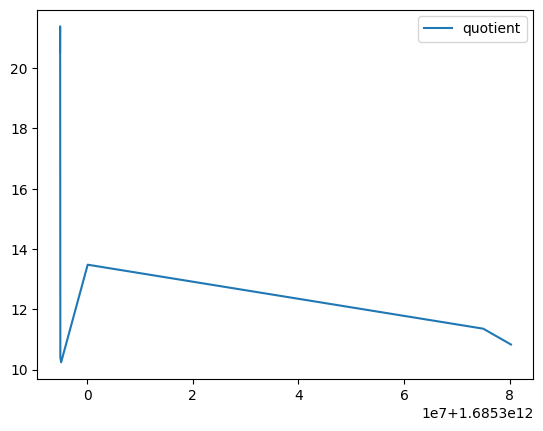

In [290]:
lastTen = r_df.iloc[-100:]
plt.plot(r_df["timestamp"], lastTen["minMinRatio"], label="quotient")
plt.legend()
plt.show()